# **Big Graph Management and Analytics: Preliminaries**

Welcome to this Jupyter Notebook on graph theory and its implementation. Graphs are a fundamental data structure in computer science and have a wide range of applications in various fields, including network analysis, social networks, transportation systems, and more.

This notebook is split in two parts. The first part will focus on some basic properties and algorithms for graphs. The second part will focus on basic linear algebra.

# **Part 1: Graph Theory Preliminaries**

In this notebook, we will cover the basics of graphs, some definitions, and common operations you can perform on graphs using Python. We will use the NetworkX library, a powerful Python package for working with graphs. Let's import this library (and other libraries relevant for this section).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

In [2]:
# Generic function for visualizing a graph
def plot(graph, title, color='lightblue'):
  pos = nx.spring_layout(graph, seed=42)
  nx.draw(graph, pos, with_labels=True, node_size=300, node_color=color, font_size=10, font_color='black', font_weight='bold')
  plt.title(title)
  plt.show()

## 1.1. Some graph properties

### 1. **Eccentricity**
The eccentricity of a vertex in a graph is defined as the maximum distance from that vertex to any other vertex in the graph. In other words, it measures how far a vertex can be from the furthest vertex in the graph.

### 2. **Diameter**
The diameter of a graph is the maximum eccentricity among all its vertices. It represents the longest shortest path between any two vertices in the graph. In essence, it measures the "longest distance" that needs to be traversed to connect two vertices in the graph.

### 3. **Radius**
The radius of a graph is the minimum eccentricity among all its vertices. It represents the shortest maximum distance from any vertex to all other vertices. It measures the "closest" a vertex can be to all other vertices in the graph.

### 4. **Center**

The center of a graph is a set of vertices with the minimum eccentricity. The center of a graph is an important concept as it represents the "most central" or "core" part of the graph.

Now, we will create some implementations of these concepts:

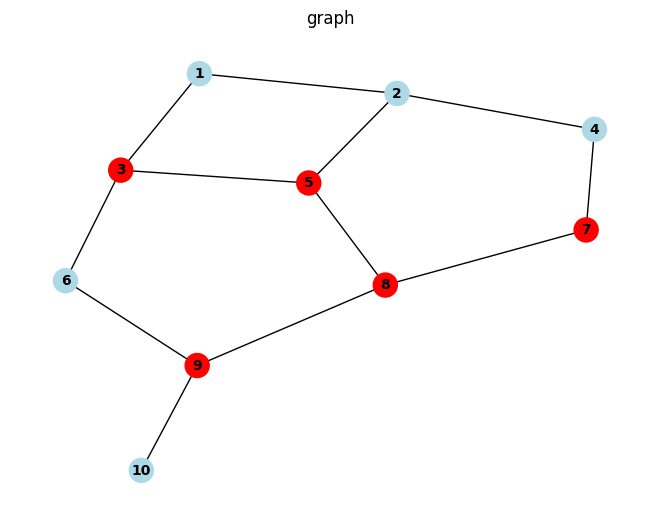

Eccentricities of vertices: {1: 4, 2: 4, 3: 3, 4: 4, 5: 3, 6: 4, 7: 3, 8: 3, 9: 3, 10: 4}
Diameter of the graph: 4
Radius of the graph: 3
Center of the graph: [3, 5, 7, 8, 9]




In [3]:
# Create a sample undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 8), (8, 9), (9, 10)])

# Calculate the graph properties defined above
eccentricities = nx.eccentricity(G)
diameter = max(eccentricities.values())
radius = min(eccentricities.values())
center = [node for node, eccentricity in eccentricities.items() if eccentricity == radius]

# Create a list of colors for nodes, where center nodes are red and others are light blue
node_colors = ['red' if node in center else 'lightblue' for node in G.nodes()]

# Plot the graph
plot(G, "graph", node_colors)

# Print properties
print("Eccentricities of vertices:", eccentricities)
print("Diameter of the graph:", diameter)
print("Radius of the graph:", radius)
print("Center of the graph:", center)
print("\n")

## 1.2. Graph Traversal Algorithms

In graph theory, two fundamental graph traversal algorithms are **Breadth-First Search** (BFS) and **Depth-First Search** (DFS). These algorithms help explore and search for nodes or vertices in a graph systematically.

### 1. **Breadth-First Search (BFS)**
Breadth-First Search explores a graph by visiting all the vertices at the current level before moving on to the next level. It starts from a source vertex and explores its neighbors first, then their neighbors, and so on. BFS is implemented using a queue data structure to maintain the order of exploration.

### 2. **Depth-First Search (DFS)**
Depth-First Search explores a graph by diving as deep as possible along one branch before backtracking. It starts from a source vertex, explores one branch of the graph as far as possible, and then backtracks to explore other branches. DFS can be implemented using a stack data structure or recursively.1.3.

Now, we will create some implementations of these algorithms:

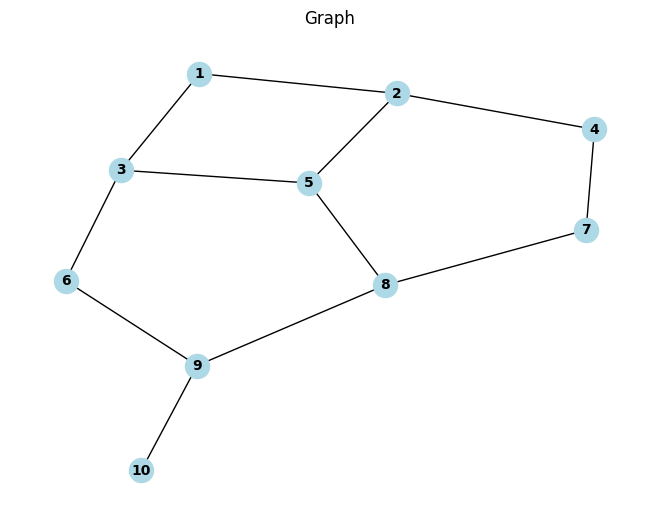


Breadth-First Search (BFS):
Queue: [2, 3] - Visited: 1
Queue: [3, 4, 5] - Visited: 2
Queue: [4, 5, 5, 6] - Visited: 3
Queue: [5, 5, 6, 7] - Visited: 4
Queue: [5, 6, 7, 8] - Visited: 5
Queue: [7, 8, 9] - Visited: 6
Queue: [8, 9, 8] - Visited: 7
Queue: [9, 8, 9] - Visited: 8
Queue: [8, 9, 10] - Visited: 9
Queue: [] - Visited: 10

Depth-First Search (DFS) using a Stack:
Stack: [2, 3] - Visited: 1
Stack: [2, 5, 6] - Visited: 3
Stack: [2, 5, 9] - Visited: 6
Stack: [2, 5, 8, 10] - Visited: 9
Stack: [2, 5, 8] - Visited: 10
Stack: [2, 5, 5, 7] - Visited: 8
Stack: [2, 5, 5, 4] - Visited: 7
Stack: [2, 5, 5, 2] - Visited: 4
Stack: [2, 5, 5, 5] - Visited: 2
Stack: [2, 5, 5] - Visited: 5

Depth-First Search (DFS) using Recursion:
Visited: 1
Visited: 2
Visited: 4
Visited: 7
Visited: 8
Visited: 5
Visited: 3
Visited: 6
Visited: 9
Visited: 10


In [4]:
# Create a sample undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 8), (8, 9), (9, 10)])

# Define the source vertex for the search
source_vertex = 1

# Breadth-First Search (BFS) using a queue
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(neighbor for neighbor in graph.neighbors(vertex) if neighbor not in visited)
            print(f'Queue: {list(queue)} - Visited: {vertex}')

# Depth-First Search (DFS) using a stack
def dfs_stack(graph, start):
    visited = set()
    stack = [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(neighbor for neighbor in graph.neighbors(vertex) if neighbor not in visited)
            print(f'Stack: {stack} - Visited: {vertex}')

# Depth-First Search (DFS) using recursion
def dfs_recursive(graph, vertex, visited):
    if vertex not in visited:
        print(f'Visited: {vertex}')
        visited.add(vertex)
        for neighbor in graph.neighbors(vertex):
            dfs_recursive(graph, neighbor, visited)

# Plot the graph
plot(G, "Graph")

# Run BFS
print('\nBreadth-First Search (BFS):')
bfs(G, source_vertex)

# Run DFS using a stack
print('\nDepth-First Search (DFS) using a Stack:')
dfs_stack(G, source_vertex)

# Run DFS using recursion
print('\nDepth-First Search (DFS) using Recursion:')
dfs_recursive(G, source_vertex, set())

## 1.3. Graph representations

In graph theory, different data structures can be used to represent graphs, each with its own advantages and use cases.

### 1. **Adjacency Matrix**
An adjacency matrix is a square matrix where each row and column represents a vertex in the graph. The entry at row i and column j (denoted as A[i][j]) is 1 if there is an edge between vertex i and vertex j, and 0 otherwise. In the case of weighted graphs, the entry may contain the weight of the edge.

### 2. **Adjacency List**
An adjacency list representation stores each vertex's neighbors in a list or other data structure. For each vertex, a list of adjacent vertices is maintained. This representation is particularly space-efficient for sparse graphs, where the number of edges is much less than the number of possible edges.

### 3. **Incidence Matrix**
An incidence matrix is a matrix with rows representing vertices and columns representing edges. For directed graphs, the entry at row i and column j (denoted as M[i][j]) is 1 if vertex i part of edge j, and 0 if vertex i is not part of edge j. As for undirected graphs, the entry at row i and column j is 1 if vertex i is the starting vertex of edge j, -1 if it is the ending vertex, and 0 if vertex i is not part of edge j.

Now, we will create some implementations of these representations:

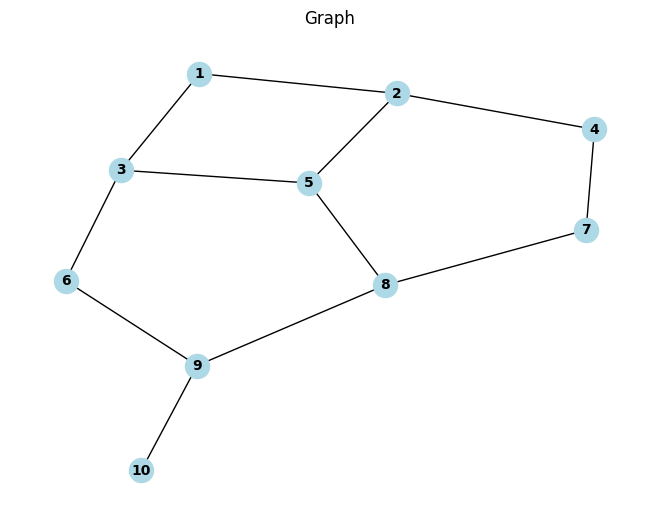

Adjacency Matrix:
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Adjacency List:
1: [2, 3]
2: [1, 4, 5]
3: [1, 5, 6]
4: [2, 7]
5: [2, 3, 8]
6: [3, 9]
7: [4, 8]
8: [5, 7, 9]
9: [6, 8, 10]
10: [9]

Incidence Matrix:
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
# Create a sample undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 8), (8, 9), (9, 10)])

# Adjacency Matrix
adj_matrix = nx.to_numpy_array(G)

# Adjacency List
adj_list = {node: list(G.neighbors(node)) for node in G.nodes()}

# Incidence Matrix
incidence_matrix = nx.incidence_matrix(G, oriented=False)

# Plot the graph
plot(G, "Graph")

# Print the representations
print("Adjacency Matrix:")
print(adj_matrix)

print("\nAdjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node}: {neighbors}")

print("\nIncidence Matrix:")
print(incidence_matrix.toarray())

## 1.4. Exercises on Graph Theory Preliminaries

This section is dedicated to solve some exercises from the lecture given on graph theory preliminaries.

### **1.4.1. Using graph traversal algorithms, propose an algorithm that computes the number of edges between a given vertex and all other vertices.**

To compute the number of edges between a given vertex and all other vertices in a graph, we will use the Breadth-First Search (BFS) algorithm. The idea is to start BFS from the given vertex and maintain a count of the edges between the source vertex and all other vertices as we traverse the graph.

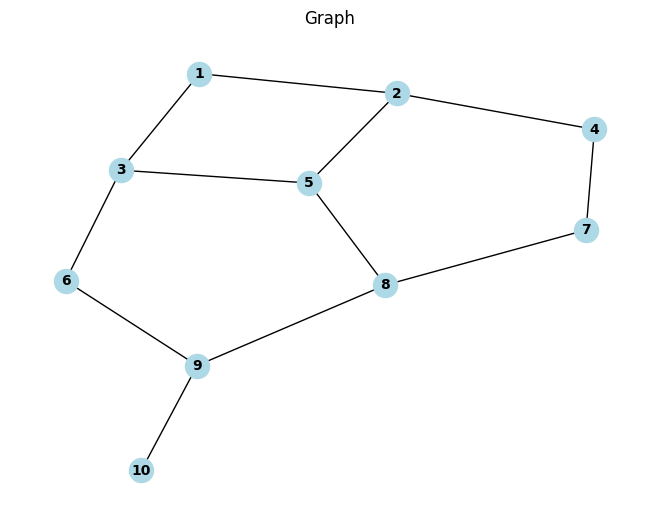

Number of edges between vertex 1 and vertex 1: 0
Number of edges between vertex 1 and vertex 2: 1
Number of edges between vertex 1 and vertex 3: 1
Number of edges between vertex 1 and vertex 4: 2
Number of edges between vertex 1 and vertex 5: 2
Number of edges between vertex 1 and vertex 6: 2
Number of edges between vertex 1 and vertex 7: 3
Number of edges between vertex 1 and vertex 8: 3
Number of edges between vertex 1 and vertex 9: 3
Number of edges between vertex 1 and vertex 10: 4


In [6]:
def BFS_DEPTH(graph, source_vertex):
    # Initialize a dictionary to store edge counts for each vertex
    edge_counts = {source_vertex: 0}

    # Initialize a queue for BFS with the source vertex
    queue = deque([source_vertex])

    while queue:
        current_vertex = queue.popleft()

        # Explore neighbors of the current vertex
        for neighbor in graph.neighbors(current_vertex):
            # Only consider unvisited neighbors
            if neighbor not in edge_counts:
                # Increment edge count for the neighbor by 1, enqueue it, and store its depth
                edge_counts[neighbor] = edge_counts[current_vertex] + 1
                queue.append(neighbor)

    return edge_counts

# Create a sample undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 8), (8, 9), (9, 10)])

# Plot the graph
plot(G, "Graph")

# Choose a source vertex (e.g., vertex 1)
source_vertex = 1

# Compute edge counts from the source vertex to all other vertices
edge_counts = BFS_DEPTH(G, source_vertex)

# Print the edge counts
for vertex, count in edge_counts.items():
    print(f"Number of edges between vertex {source_vertex} and vertex {vertex}: {count}")

### **1.4.2. Propose an algorithm that determines if a graph contains an odd cycle.**

For this exercise, we will perform a BFS-based traversal of the graph and checks if there's an odd cycle by comparing the depths of connected nodes. If the algorithm finds two connected nodes with the same depth, it immediately returns True to indicate the presence of an odd cycle. Otherwise, it returns False.

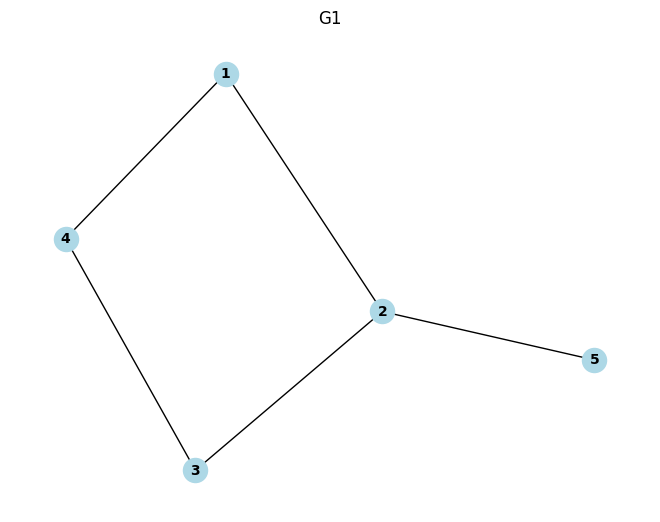

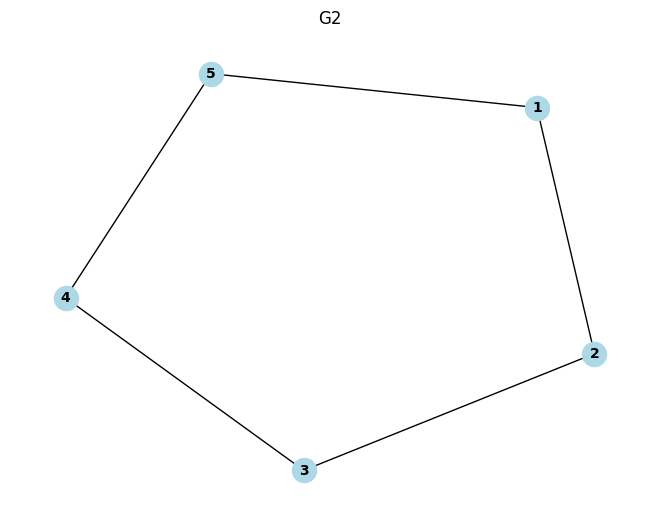

G1 contains an odd cycle: False
G2 contains an odd cycle: True


In [7]:
def HAS_ODD_CYCLE(graph):
    # Calculate the depth of each vertex using BFS_DEPTH
    depths = BFS_DEPTH(graph, list(graph.nodes())[0])

    # Iterate through the edges and check for an odd cycle
    for edge in graph.edges():
        n1, n2 = edge
        if depths[n1] == depths[n2]:
            return True

    # No odd cycle found
    return False

# Create a sample graph without an odd cycle
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 5)])
plot(G1, "G1")

# Create a sample graph with an odd cycle
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])
plot(G2, "G2")

# Check if G1 contains an odd cycle
result1 = HAS_ODD_CYCLE(G1)
print(f"G1 contains an odd cycle: {result1}")

# Check if G2 contains an odd cycle
result2 = HAS_ODD_CYCLE(G2)
print(f"G2 contains an odd cycle: {result2}")

### **1.4.3. Propose an algorithm that determines if a graph is 2-colorable. The algorithm should stop as soon as possible when it identifies that the graph is not 2-colorable.**

For this exercise, we will use a modified DFS algorithm. This algorithm will associate colors 0 and 1 to vertices while ensuring that adjacent vertices have different colors. If at any point during the DFS traversal we encounter a conflict (i.e., two adjacent vertices with the same color), we will immediately conclude that the graph is not 2-colorable and then stop the traversal.

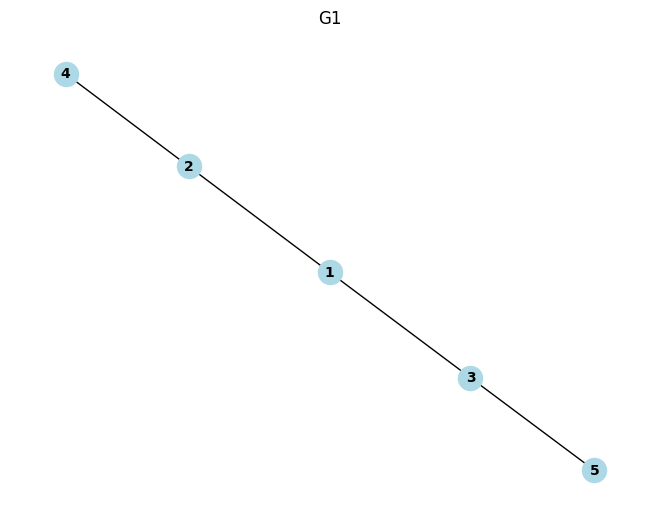

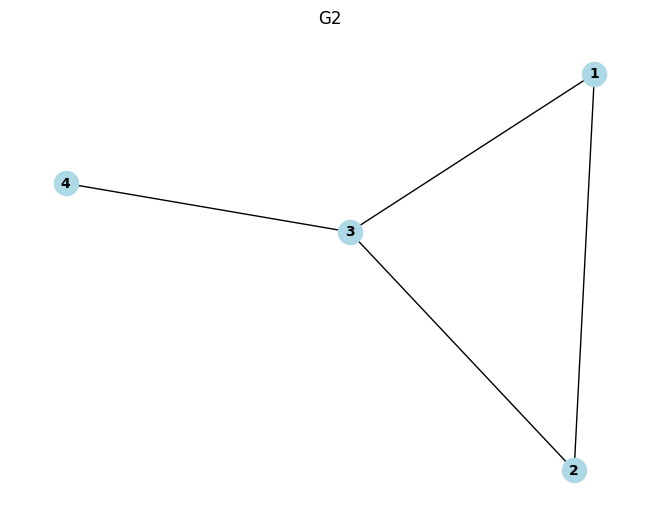

G1 is 2-colorable: True
Coloring: {1: 0, 2: 1, 3: 1, 5: 0, 4: 0}
G2 is 2-colorable: False


In [8]:
def is_2_colorable(graph):
    # Initialize a dictionary to store colors (0 or 1) for each vertex
    colors = {}

    # Iterate through all connected components (in case the graph is not connected)
    for component in nx.connected_components(graph):
        stack = []  # Stack to perform DFS
        start_vertex = component.pop()  # Start with an arbitrary vertex

        # Assign the first vertex color 0
        colors[start_vertex] = 0
        stack.append(start_vertex)

        while stack:
            current_vertex = stack.pop()
            current_color = colors[current_vertex]

            # Determine the color to assign to neighbors
            neighbor_color = 1 - current_color  # Toggle between 0 and 1

            for neighbor in graph.neighbors(current_vertex):
                if neighbor not in colors:
                    colors[neighbor] = neighbor_color
                    stack.append(neighbor)
                elif colors[neighbor] != neighbor_color:
                    return False, None  # Conflict, graph is not 2-colorable

    return True, colors

# Create a sample 2-colorable graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5)])
plot(G1, "G1")

# Create a sample 2-colorable graph
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4)])
plot(G2, "G2")

# Check if G1 is 2-colorable and get the coloring
result1, coloring1 = is_2_colorable(G1)
print(f"G1 is 2-colorable: {result1}")
if result1:
    print("Coloring:", coloring1)

# Check if G2 is 2-colorable and get the coloring
result2, coloring2 = is_2_colorable(G2)
print(f"G2 is 2-colorable: {result2}")
if result2:
    print("Coloring:", coloring2)

# **Part 2: Linear Algebra Preliminaries**

##2. Properties of a Square Matrix

A square matrix is a matrix with the same number of rows and columns on both sides. The square matrix of order m is known as the m x m matrix in mathematics. The order of the final matrix remains the same when we multiply or add any two square matrices.

For this section, let's import some libraries to help us in delving into the properties of a square matrix.

In [9]:
from scipy.linalg import fractional_matrix_power
from scipy.linalg import sqrtm, orth
import sympy as sp
import math

#### 2.1. Vector Norms

Vector norms are mathematical measures of the "size" or magnitude of a vector. They help quantify how far a vector extends from the origin in space. Two common vector norms are the L1 and L2 norms.

- L1 Norm (Manhattan Norm): The L1 norm is the sum of the absolute values of the vector's elements. It measures the "city block" distance from the origin to the vector
Mathematically: $||v||_1=\sum^n_{i=1}|v_i|$

- L2 Norm (Euclidean Norm): The L2 norm is the square root of the sum of the squares of the vector's elements. It measures the "as-the-crow-flies" distance from the origin to the vector.
Mathematically: $||v||_2=\sqrt{\sum^n_{i=1}|v_i|^2}$






In [10]:
# Example vector
v = np.array([1, 2, 3])
print("Vector:", v)

# L1 norm
l1_norm = np.linalg.norm(v, ord=1)
print("L1 norm:", l1_norm)

# L2 norm
l2_norm = np.linalg.norm(v, ord=2)
print("L2 norm:", l2_norm)

Vector: [1 2 3]
L1 norm: 6.0
L2 norm: 3.7416573867739413


#### 2.2. Matrix Norms

Matrix norms are mathematical measures of the "size" or magnitude of a matrix. One common matrix norm is the Frobenius norm.

Frobenius Norm: The Frobenius norm is a measure of the "size" of a matrix, computed as the square root of the sum of the squares of its elements.

Mathematically: $||A||_F = \sqrt{\sum^m_{i=1}\sum^n_{j=1}|a_{ij}|^2}$

As a first step, we create a square matrix by specifying its dimensions and values. For example, let's create a $3\times3$ matrix $A$:

In [11]:
# Creation of the matrix A
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"A={A}")

A=[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
nb_rows = len(A)
print(f"Number of rows of A: \n{nb_rows}")
nb_columns = len(A[0])
print(f"Number of columns of A: \n{nb_columns}")

Number of rows of A: 
3
Number of columns of A: 
3


In [13]:
norm_A = np.linalg.norm(A, ord='fro')
print(f"Norm of A: {norm_A}")

Norm of A: 16.881943016134134


#### 2.3. Matrix Transpose

The transpose of a matrix $A$, denoted as $A^T$, is a new matrix that results from swapping the rows and columns of $A$. In other words, the $i$-th row of $A^T$ is the $i$-th column of $A$ and vice versa.

Mathematically: $A_{ij}^T=A_{ji}$

In [14]:
# Transpose of a matrix
A_transpose = np.transpose(A)
print(f"Transpose of A: \n{A_transpose}")

Transpose of A: 
[[1 4 7]
 [2 5 8]
 [3 6 9]]


#### 2.4. Matrix Determinant

The determinant of a square matrix is a scalar value that provides important information about the matrix. Determinants are used to determine whether a matrix is invertible and to compute the scaling factor of a linear transformation represented by the matrix.

In [15]:
# Determinant of a matrix
determinant = np.linalg.det(A)
print(f"Determinant of A: \n{determinant}")

Determinant of A: 
0.0


A determinant equal to zero means that a matrix is a singular matrix. A matrix is singular if it does not have an inverse, which means it cannot be used to solve systems of linear equations.

#### 2.5. Eigenvectors and Eigenvalues

Eigenvalues and eigenvectors are fundamental concepts in linear algebra. They describe how a matrix behaves under linear transformations.

- **Eigenvalues**: Eigenvalues are scalar values that represent how a matrix scales or stretches space along its eigenvectors. An eigenvalue $\lambda$ of a matrix $A$ satisfies the equation $Av=\lambda v$, where $v$ is the eigenvector associated with $\lambda$. Eigenvalues can be real or complex.

- Eigenvectors: Eigenvectors are non-zero vectors that, when transformed by a matrix, only change in magnitude (scaled), not in direction. They represent the directions along which the matrix primarily acts.

In [16]:
# 1. Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# 2. Check if all eigenvalues are real (for real matrices)
is_real_eigenvalues = np.all(np.isreal(eigenvalues))

print(f"Eigenvalues of A: \n{eigenvalues}")
print(f"Eigenvectors of A: \n{eigenvectors}")

Eigenvalues of A: 
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
Eigenvectors of A: 
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


#### 2.6. Eigen Decomposition

Eigendecomposition is a fundamental concept in linear algebra, where a matrix is decomposed into its eigenvalues and eigenvectors. For a square matrix
$A$, the eigendecomposition is represented as:

$A = P.DP^{-1}$

where:

- $P$ is a matrix whose columns are the eigenvectors of $A$.
- $D$ is a diagonal matrix whose diagonal elements are the eigenvalues of $(A)$.
- $P^{-1}$ is the inverse of the matrix $P$.

In practice, eigendecomposition can only be applied to diagonalizable matrices (those with a full set of linearly independent eigenvectors). The matrix must also be symmetric if real eigenvalues and real eigenvectors are desired.


In [17]:
# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(A)

# Reconstruct A from the eigendecomposition
A_reconstructed = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))

# Check if A_reconstructed is equal to the original matrix A (within a tolerance)
is_eigendecomposition = np.allclose(A, A_reconstructed)

# Display results
if is_eigendecomposition:
    print("Eigendecomposition is successful.")
else:
    print("Eigendecomposition is not successful.")

Eigendecomposition is successful.


#### 2.7. Invertible Matrix

An invertible matrix needs to satisfy the following conditions, given that those properties are equivalents:

- All vectors in $A$ are linearly independent
- $det(A) \neq 0$
- $0$ is not an eigenvalue of $A$
- $A^T$ is invertible

We have found out that $0$ is not an eigenvalue of $A$, however $det(A)=0$, which indicates that the matrix $A$ does not have an inverse. Let's check it with the function below. The rank of a matrix is the number of independent rows. When the rank of a square matrix = the number of rows, it has "full rank" and is non-singular, so it has an inverse.

In [18]:
# Check if a matrix A is invertible
def is_invertible(matrix):
  invertible = np.linalg.matrix_rank(matrix) == matrix.shape[0]
  return invertible

print("Is this matrix invertible?", is_invertible(A))

Is this matrix invertible? False


Since the matrix $A$ is, indeed, not invertible, the same can be expected for $A^T$:

In [19]:
# Check if a matrix A transpose is invertible
print("Is this matrix invertible?",is_invertible(A_transpose))

Is this matrix invertible? False


Now we introduce a matrix $B_{3\times3}$.

In [20]:
# Creation of the matrix B
B = np.array([[2, 0, 4], [3, 1, 2], [1, 5, 3]])
print(f"B={B}")

B=[[2 0 4]
 [3 1 2]
 [1 5 3]]


We will check if some properties apply to infer if this matrix is invertible.

In [21]:
# Determinant of a matrix
determinant = np.linalg.det(B)
print(f"Determinant of B: \n{determinant}")

Determinant of B: 
42.00000000000002


The condition that $det(B) \neq 0$ is checked.

In [22]:
# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(B)
print(f"Eigenvalues of B: \n{eigenvalues}")
print(f"Eigenvectors of B: \n{eigenvectors}")

Eigenvalues of B: 
[ 7.22094895+0.j         -0.61047448+2.33318044j -0.61047448-2.33318044j]
Eigenvectors of B: 
[[ 5.33228306e-01+0.j         -6.60410816e-01+0.j
  -6.60410816e-01-0.j        ]
 [ 4.80901519e-01+0.j          6.16807095e-04+0.47927982j
   6.16807095e-04-0.47927982j]
 [ 6.95989441e-01+0.j          4.30996395e-01-0.3852144j
   4.30996395e-01+0.3852144j ]]


The condition that $B$ does not have any $0$ eigenvalues is also checked. So, we expect this matrix to be invertible.

In [23]:
# Check if a matrix B is invertible
print("Is this matrix invertible?",is_invertible(B))

Is this matrix invertible? True


Given that $B$ is invertible, we can now find $B^{-1}$:

In [24]:
B_inv = np.linalg.inv(B)
print(f"Inverse of B: \n{B_inv}")

Inverse of B: 
[[-0.16666667  0.47619048 -0.0952381 ]
 [-0.16666667  0.04761905  0.19047619]
 [ 0.33333333 -0.23809524  0.04761905]]


#### 2.8. Orthogonal Matrix

A real matrix, $U$, is orthogonal if $U^TU = UU^T = I$. An orthogonal matrix needs to satisfy the following conditions, given that those properties are equivalents:

- $U^T$ is orthogonal
- $U^T$ = $U^{-1}$
- $det(U) = 1$
- $U$’s eigenvectors are orthonormal (the pairwise dot product is $0$ and the norm is $1$)

 We already know that $det(A)=0$ and $det(B)=42$, so the matrices $A$ and $B$ can not be orthogonal. We can verify that by a function that checks if a matrix is orthogonal by verifying if the product of this matrix and its transpose is approximately equal to the identity matrix.

In [25]:
# Check if a matrix is orthogonal
def is_orthogonal(matrix):
  orthogonal = np.allclose(np.dot(matrix, matrix.T), np.identity(matrix.shape[0]))
  return orthogonal

print("Is matrix A orthogonal?",is_orthogonal(A))
print("Is matrix B orthogonal?",is_orthogonal(B))

Is matrix A orthogonal? False
Is matrix B orthogonal? False


Neither of the matrices we have been working with so far are orthogonal. So here are some examples of orthogonal matrices. For each of them we are going to check the validity of a condition.



- A $2\times2$ Identity Matrix

In [26]:
I = np.array([[1, 0],
             [0, 1]])
print(f"I={I}")

I=[[1 0]
 [0 1]]


In [27]:
print("Is matrix I orthogonal?",is_orthogonal(I))

Is matrix I orthogonal? True


Since the matrix $I$ is orthogonal, $I^T$ is also orthogonal:

In [28]:
I_transpose = np.transpose(I)
print("Is matrix I transpose orthogonal?",is_orthogonal(I_transpose))

Is matrix I transpose orthogonal? True


- A $3\times3$ Rotation Matrix

In [29]:
theta = math.pi/4  # 45-degree rotation
R = np.array([[math.cos(theta), -math.sin(theta), 0],
             [math.sin(theta), math.cos(theta), 0],
             [0, 0, 1]])
print(f"R={R}")

R=[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


For this matrix, we will check if the condition $U^T$ = $U^{-1}$ applies.

In [30]:
R_transpose = np.transpose(R)
R_inv = np.linalg.inv(R)
is_transpose_equal_inverse_R = R_transpose == R_inv
print("Is R transpose qual to R inverse?", is_transpose_equal_inverse_R)

Is R transpose qual to R inverse? [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


Since all of the elements in both of $R^T$ and $R^{-1}$ are the same, the condition is satisfied.

In [31]:
print("Is matrix R orthogonal?",is_orthogonal(R))

Is matrix R orthogonal? True


- $3\times3$ Permutation Matrix

In [32]:
P = np.array([[0, 1, 0],
             [0, 0, 1],
             [1, 0, 0]])
print(f"P={P}")

P=[[0 1 0]
 [0 0 1]
 [1 0 0]]


We can check if $det(P)=1$, so that $P$ satisfies the condition for being an orthogonal matrix.

In [33]:
determinant_P = np.linalg.det(P)
print(f"Determinant of P: \n{determinant_P}")

Determinant of P: 
1.0


The condition is satisfied, so $P$ is confirmed to be an orthogonal matrix.

In [34]:
print("Is matrix R orthogonal?",is_orthogonal(P))

Is matrix R orthogonal? True


#### 2.9. Positive (Semi-)Definite Matrices

A matrix is considered positive definite if it has several key properties:

- All of its eigenvalues are non negative.
- It is symmetric ($A = A^T$), meaning it is equal to its transpose.
- Its determinants are non negative.

Let us define a matrix $C_{2\times2}$:

In [35]:
# Define a matrix (example)
C = np.array([[4, 1],
              [1, 3]])

In [36]:
# 1. Check if the matrix is symmetric
is_symmetric = np.array_equal(C, C.T)

# 2. Calculate the eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(C)

# 3. Check if all eigenvalues are positive (for positive definite)
is_positive_definite = all(eigenvalues > 0)

# 4. Check if all eigenvalues are non-negative (for positive semi-definite)
is_positive_semi_definite = all(eigenvalues >= 0)

# 5. Check orthogonality of eigenvectors (optional)
is_orthogonal_eigenvectors = np.allclose(np.dot(eigenvectors, eigenvectors.T), np.identity(C.shape[0]))

# Display results
if is_symmetric:
    print("The matrix is symmetric.")
    if is_positive_definite:
        print("The matrix is positive definite.")
    elif is_positive_semi_definite:
        print("The matrix is positive semi-definite.")
    else:
        print("The matrix does not meet the conditions for positive definite/semi-definite.")
else:
    print("The matrix is not symmetric.")


The matrix is symmetric.
The matrix is positive definite.


#### 2.10. Laplacian Matrix

A Laplacian matrix is a special type of square matrix commonly used in graph theory. It can be used to study graph's properties. For undirected graphs, the Laplacian matrix can be derived by subtracting the adjacency matrix of the graph from its degree matrix. A Laplacian matrix satisfies several important properties:

- It is symmetric.
- Its eigenvalues are real.
- It has a non-negative determinant.
- The sum of the elements in each row and column (except the diagonal) is zero.

In [37]:
# 1. Check if the matrix is symmetric
is_symmetric = np.array_equal(C, C.T)

# 2. Check if the eigenvalues are real
eigenvalues, _ = np.linalg.eig(C)
is_real_eigenvalues = np.all(np.isreal(eigenvalues))

# 3. Check if the determinant is non-negative
determinant = np.linalg.det(C)
is_non_negative_determinant = determinant >= 0

# 4. Check the row/column sum condition
is_row_col_sum_zero = all(np.sum(C, axis=1) == 0) and all(np.sum(C, axis=0) == 0)

# Display results
if is_symmetric and is_real_eigenvalues and is_non_negative_determinant and is_row_col_sum_zero:
    print("The matrix satisfies the conditions for a Laplacian matrix.")
else:
    print("The matrix does not meet the conditions for a Laplacian matrix.")

The matrix does not meet the conditions for a Laplacian matrix.


Introducing a new matrix $L_{3\times3}$:

In [38]:
# Define a matrix
L = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])


In this updated example, the matrix $L$ is symmetric, has real eigenvalues, a non-negative determinant, and the sum of elements in each row and column (except the diagonal) is zero. These properties are indicative of a Laplacian matrix. If we run this code, it should indicate that the matrix satisfies the conditions for a Laplacian matrix.

In [39]:
# 1. Check if the matrix is symmetric
is_symmetric = np.array_equal(L, L.T)

# 2. Check if the eigenvalues are real
eigenvalues, _ = np.linalg.eig(L)
is_real_eigenvalues = np.all(np.isreal(eigenvalues))

# 3. Check if the determinant is non-negative
determinant = np.linalg.det(L)
is_non_negative_determinant = determinant >= 0

# 4. Check the row/column sum condition
is_row_col_sum_zero = all(np.sum(L, axis=1) == 0) and all(np.sum(L, axis=0) == 0)

# Display results
if is_symmetric and is_real_eigenvalues and is_non_negative_determinant and is_row_col_sum_zero:
    print("The matrix satisfies the conditions for a Laplacian matrix.")
else:
    print("The matrix meets the conditions for a Laplacian matrix.")

The matrix meets the conditions for a Laplacian matrix.
